Temperature Fields

In [3]:
import pandas as pd
import glob
import os

file_path = ""

files = glob.glob(os.path.join(file_path,"**", "*Temperature*.txt"), recursive=True)

dfs = []
for file in files:
    df = pd.read_csv(file, sep="\t", decimal=",", dtype="float32")
    df["source_file"] = file
    dfs.append(df)
df_all = pd.concat(dfs, ignore_index=True)

df_all.to_csv("AllTempData.csv", index=False)

stats = df_all.describe()
stats.to_csv("stats_temp.csv")
stats

,Unnamed: 0,Steps,Time [s],[A] Probe1_Carrier_center [°C],[B] Probe2_Carrier_corner1 [°C],[C] Probe3_GuideRail_top [°C],[D] Probe4_GuideRail_middle [°C],[E] Probe5_GuideRail_bottom [°C],[F] Probe6_MotorBase_front [°C],[G] Probe7_MotorBase_side [°C],...,[U] Probe24_Structure_back_1 [°C],[V] Probe25_Structure_back_2 [°C],[W] Probe26_Structure_back_3 [°C],[X] Probe27_Structure_back_4 [°C],[Y] Probe28_Structure_back_5 [°C],[Z] Probe29_Structure_back_6 [°C],[AA] Probe9_Temperature_BearingTop [°C],[AB] Probe10_Temperature_BearingBottom [°C],[AC] Probe17_Temperature_Structure_lateral_3 [°C],Unnamed: 32
count,30600.000000,30600.0,30600.000000,30600.000000,30600.000000,30600.000000,30600.000000,30600.000000,30600.000000,30600.000000,...,30600.000000,30600.000000,30600.000000,30600.000000,30600.000000,30600.000000,30600.000000,30600.000000,30600.000000,0.0
mean,900.500000,1.0,900.500000,30.145859,30.538980,30.468042,32.070236,29.831621,39.185852,36.125160,...,30.196251,30.005917,29.720539,28.991739,30.007154,28.644800,30.482164,29.778463,30.086229,NaN
std,519.623657,0.0,519.623657,7.958944,7.894823,7.888932,8.003528,6.486608,9.918967,8.850349,...,8.086628,7.881484,7.071447,6.623858,7.894639,7.279464,7.850297,6.824734,7.949339,NaN
min,1.000000,1.0,1.000000,20.000000,20.000000,20.000000,20.042000,19.353001,20.070999,20.070000,...,20.000000,19.999001,19.393000,18.638000,20.000000,18.378000,20.002001,19.292000,20.000000,NaN
25%,450.750000,1.0,450.750000,20.981001,21.924999,21.687750,23.831750,24.745500,31.256001,28.757750,...,20.724751,21.136500,22.717750,22.862501,21.517500,20.884500,21.896999,23.962749,21.324750,NaN
50%,900.500000,1.0,900.500000,30.118000,30.533001,30.448000,32.141998,29.798000,40.686001,37.057499,...,30.163000,30.002001,29.684000,28.944000,30.003000,28.589001,30.407000,29.737000,30.073500,NaN
75%,1350.250000,1.0,1350.250000,39.066502,38.814999,38.720251,40.551998,34.893002,45.369249,43.210999,...,39.816751,38.863500,36.743999,34.997252,38.499500,36.112000,38.767249,35.610001,38.760499,NaN
max,1800.000000,1.0,1800.000000,40.838001,41.926998,41.702000,44.342999,40.212002,60.990002,54.820000,...,41.022999,40.070999,40.000000,40.000000,40.081001,39.997002,42.094002,40.133999,40.486000,NaN


In [4]:
import pandas as pd

df = pd.read_csv("stats_temp.csv")

probes = [col for col in df.columns if "Probe" in col]

unit = r"$^\circ\mathrm{C}$"

for idx, probe in enumerate(probes, 1):
    min_val = df[probe][df.iloc[:, 0].str.lower().str.startswith("min")].values[0]
    max_val = df[probe][df.iloc[:, 0].str.lower().str.startswith("max")].values[0]
    mean_val = df[probe][df.iloc[:, 0].str.lower().str.startswith("mean")].values[0]
    std_val = df[probe][df.iloc[:, 0].str.lower().str.startswith("std")].values[0]
    print(f"{idx} & {min_val:.2f} & {max_val:.2f} & {mean_val:.2f} & {std_val:.2f} & {unit} \\\\")

1 & 20.00 & 40.84 & 30.15 & 7.96 & $^\circ\mathrm{C}$ \\
2 & 20.00 & 41.93 & 30.54 & 7.89 & $^\circ\mathrm{C}$ \\
3 & 20.00 & 41.70 & 30.47 & 7.89 & $^\circ\mathrm{C}$ \\
4 & 20.04 & 44.34 & 32.07 & 8.00 & $^\circ\mathrm{C}$ \\
5 & 19.35 & 40.21 & 29.83 & 6.49 & $^\circ\mathrm{C}$ \\
6 & 20.07 & 60.99 & 39.19 & 9.92 & $^\circ\mathrm{C}$ \\
7 & 20.07 & 54.82 & 36.13 & 8.85 & $^\circ\mathrm{C}$ \\
8 & 20.07 & 57.14 & 37.03 & 9.13 & $^\circ\mathrm{C}$ \\
9 & 20.00 & 41.31 & 30.28 & 8.04 & $^\circ\mathrm{C}$ \\
10 & 20.00 & 40.79 & 30.13 & 8.01 & $^\circ\mathrm{C}$ \\
11 & 19.81 & 40.51 & 30.08 & 7.27 & $^\circ\mathrm{C}$ \\
12 & 18.41 & 40.00 & 28.62 & 7.63 & $^\circ\mathrm{C}$ \\
13 & 18.25 & 40.00 & 28.54 & 7.73 & $^\circ\mathrm{C}$ \\
14 & 19.85 & 40.00 & 29.98 & 7.81 & $^\circ\mathrm{C}$ \\
15 & 20.00 & 40.38 & 30.06 & 7.94 & $^\circ\mathrm{C}$ \\
16 & 20.00 & 40.18 & 30.02 & 7.94 & $^\circ\mathrm{C}$ \\
17 & 20.00 & 40.94 & 30.17 & 7.90 & $^\circ\mathrm{C}$ \\
18 & 20.00 & 41.06 & 30

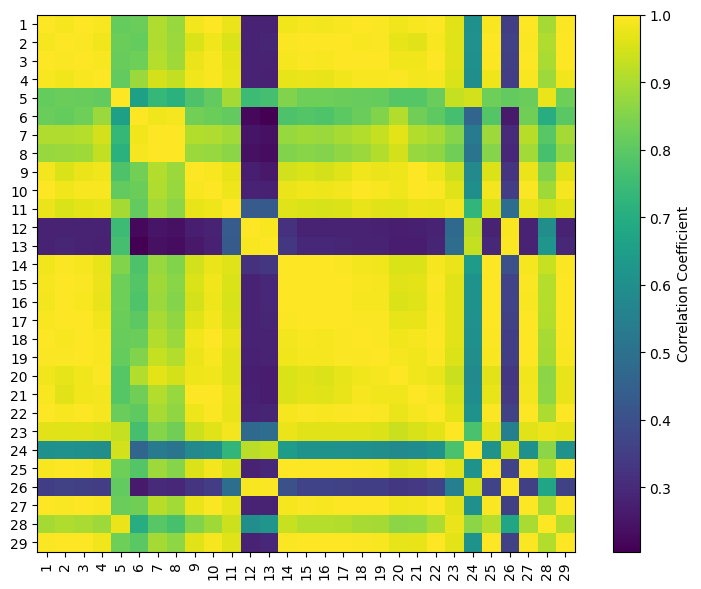

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("AllTempData.csv")
probe_cols = [col for col in df.columns if "Probe" in col]
probes = df[probe_cols]
corr = probes.corr()
num_nodes = len(corr)
node_labels = [f"{i+1}" for i in range(num_nodes)]

plt.figure(figsize=(8, 6))
im = plt.imshow(corr, cmap="viridis")
plt.colorbar(im, label="Correlation Coefficient")
plt.xticks(range(num_nodes), node_labels, rotation=90)
plt.yticks(range(num_nodes), node_labels)
plt.tight_layout()
plt.savefig("corrTemp.png", dpi=300)
plt.show()

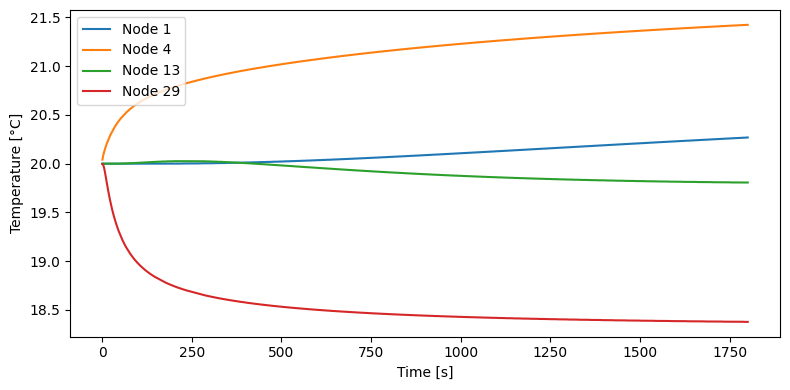

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("TransientThermalSimulationFE_Run001_Temperature_07052025.txt", sep="\t", decimal=",", engine="python")

time = df["Time [s]"]

probe_columns = [
    "[A] Probe1_Carrier_center [°C]",
    "[D] Probe4_GuideRail_middle [°C]",
    "[K] Probe13_Structure_front_3 [°C]",
    "[Z] Probe29_Structure_back_6 [°C]",
]

col_names = ["1", "4", "13", "29"]
plt.figure(figsize=(8, 4))
for col, col_name in zip(probe_columns, col_names):
    plt.plot(time, df[col], label=f"Node {col_name}")

plt.xlabel("Time [s]")
plt.ylabel("Temperature [°C]")
plt.legend()
plt.tight_layout()
plt.savefig("plotTemp.png", dpi=300)
plt.show()

Heat Flux Fields

In [13]:
import pandas as pd
import glob
import os

file_path = ""

files = glob.glob(os.path.join(file_path,"**", "*HeatFlux*.txt"), recursive=True)

dfs = []
for file in files:
    df = pd.read_csv(file, sep="\t", decimal=",", dtype="float32")
    df["source_file"] = file
    dfs.append(df)
df_all = pd.concat(dfs, ignore_index=True)

df_all.to_csv("AllHeatFluxData.csv", index=False)

stats = df_all.describe()
stats.to_csv("stats_heatflux.csv")
stats

,Unnamed: 0,Steps,Time [s],[A] Probe1_Heat Flux_Carrier_center (Total) [W/m²],[B] Probe2_Heat Flux_Carrier_corner1 (Total) [W/m²],[C] Probe3_Heat Flux_GuideRail_top (Total) [W/m²],[D] Probe4_Heat Flux_GuideRail_middle (Total) [W/m²],[E] Probe5_Heat Flux_GuideRail_bottom (Total) [W/m²],[F] Probe6_Heat Flux_MotorBase_front (Total) [W/m²],[G] Probe7_Heat Flux_MotorBase_side (Total) [W/m²],...,[U] Probe21_Heat Flux_Structure_top_2 (Total) [W/m²],[V] Probe22_Heat Flux_Structure_top_3 (Total) [W/m²],[W] Probe23_Heat Flux_Structure_top_4 (Total) [W/m²],[X] Probe24_Heat Flux_Structure_back_1 (Total) [W/m²],[Y] Probe25_Heat Flux_Structure_back_2 (Total) [W/m²],[Z] Probe26_Heat Flux_Structure_back_3 (Total) [W/m²],[AA] Probe27_Heat Flux_Structure_back_4 (Total) [W/m²],[AB] Probe28_Heat Flux_Structure_back_5 (Total) [W/m²],[AC] Probe29_Heat Flux_Structure_back_6 (Total) [W/m²],Unnamed: 32
count,30600.000000,30600.0,30600.000000,30600.000000,30600.000000,30600.000000,30600.000000,30600.000000,30600.000000,30600.000000,...,30600.000000,30600.000000,30600.000000,3.060000e+04,3.060000e+04,30600.000000,30600.000000,3.060000e+04,30600.000000,0.0
mean,900.500000,1.0,900.500000,139.785706,193.818359,217.739365,851.707947,274.164703,999.279480,1223.930176,...,185.380692,188.180756,1728.125610,2.066011e+02,2.365864e+02,917.340210,3145.149170,3.201499e+02,2814.569336,NaN
std,519.623657,0.0,519.623657,207.298889,270.921021,306.067383,403.877747,315.885956,484.791229,609.475891,...,181.782303,246.723358,998.047424,2.040201e+02,2.829792e+02,757.360352,2538.944092,4.059940e+02,2425.879150,NaN
min,1.000000,1.0,1.000000,0.000048,0.000041,0.015194,261.480011,0.350740,352.410004,347.809998,...,0.000002,0.000001,0.020312,2.276000e-07,2.238200e-08,0.000054,0.260620,3.762600e-08,31.996000,NaN
25%,450.750000,1.0,450.750000,3.490300,18.001501,15.152250,421.089996,18.903500,499.829987,621.817505,...,47.224751,21.583750,912.297485,4.444400e+01,6.901900e+00,214.517502,658.909988,4.066225e+00,589.397476,NaN
50%,900.500000,1.0,900.500000,13.074500,61.914999,58.198502,818.454987,167.134995,999.619995,1248.599976,...,138.570007,94.481998,1294.649963,1.329450e+02,1.302800e+02,804.340027,2430.599976,1.115450e+02,1968.250000,NaN
75%,1350.250000,1.0,1350.250000,186.382504,271.105003,292.487511,1224.000000,385.269997,1499.400024,1841.400024,...,258.084991,248.192501,2747.125061,3.427350e+02,3.104000e+02,1512.450012,5568.225098,4.626825e+02,4823.600098,NaN
max,1800.000000,1.0,1800.000000,961.190002,1574.900024,1675.199951,2068.100098,1678.099976,1499.599976,2192.800049,...,940.239990,1319.500000,3667.300049,7.328500e+02,9.783100e+02,2694.699951,9130.599609,1.692000e+03,11828.000000,NaN


In [14]:
import pandas as pd

df = pd.read_csv("stats_heatflux.csv")

probes = [col for col in df.columns if "Probe" in col]

unit = r"$\mathrm{W}/\mathrm{m}^{2}$"

for idx, probe in enumerate(probes, 1):
    min_val = df[probe][df.iloc[:, 0].str.lower().str.startswith("min")].values[0]
    max_val = df[probe][df.iloc[:, 0].str.lower().str.startswith("max")].values[0]
    mean_val = df[probe][df.iloc[:, 0].str.lower().str.startswith("mean")].values[0]
    std_val = df[probe][df.iloc[:, 0].str.lower().str.startswith("std")].values[0]
    print(f"{idx} & {min_val:.2f} & {max_val:.2f} & {mean_val:.2f} & {std_val:.2f} & {unit} \\\\")

1 & 0.00 & 961.19 & 139.79 & 207.30 & $\mathrm{W}/\mathrm{m}^{2}$ \\
2 & 0.00 & 1574.90 & 193.82 & 270.92 & $\mathrm{W}/\mathrm{m}^{2}$ \\
3 & 0.02 & 1675.20 & 217.74 & 306.07 & $\mathrm{W}/\mathrm{m}^{2}$ \\
4 & 261.48 & 2068.10 & 851.71 & 403.88 & $\mathrm{W}/\mathrm{m}^{2}$ \\
5 & 0.35 & 1678.10 & 274.16 & 315.89 & $\mathrm{W}/\mathrm{m}^{2}$ \\
6 & 352.41 & 1499.60 & 999.28 & 484.79 & $\mathrm{W}/\mathrm{m}^{2}$ \\
7 & 347.81 & 2192.80 & 1223.93 & 609.48 & $\mathrm{W}/\mathrm{m}^{2}$ \\
8 & 339.66 & 1537.20 & 978.86 & 474.87 & $\mathrm{W}/\mathrm{m}^{2}$ \\
9 & 4.43 & 7669.20 & 2022.62 & 2048.50 & $\mathrm{W}/\mathrm{m}^{2}$ \\
10 & 14.48 & 1741.00 & 559.93 & 438.46 & $\mathrm{W}/\mathrm{m}^{2}$ \\
11 & 0.00 & 896.78 & 199.57 & 221.40 & $\mathrm{W}/\mathrm{m}^{2}$ \\
12 & 0.00 & 307.34 & 59.41 & 78.86 & $\mathrm{W}/\mathrm{m}^{2}$ \\
13 & 0.18 & 1013.80 & 474.39 & 319.01 & $\mathrm{W}/\mathrm{m}^{2}$ \\
14 & 15.45 & 10656.00 & 2539.30 & 2130.18 & $\mathrm{W}/\mathrm{m}^{2}$ \\
15 &

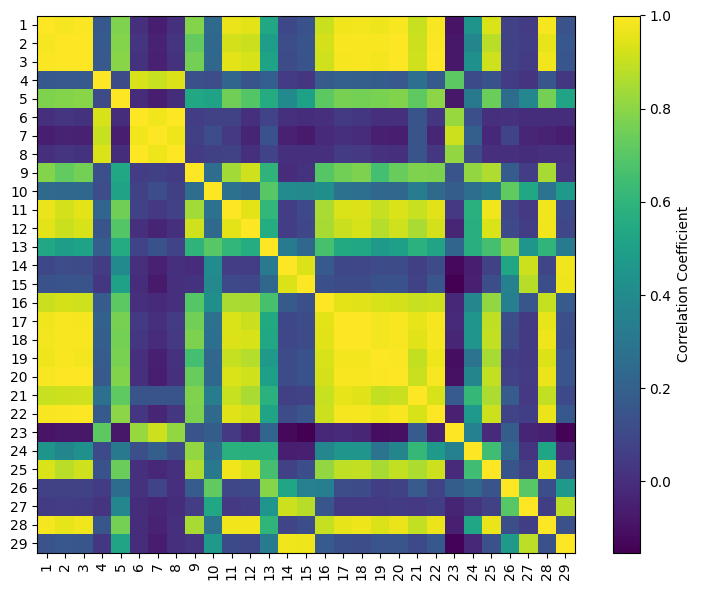

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("AllHeatFluxData.csv")
probe_cols = [col for col in df.columns if "Probe" in col]
probes = df[probe_cols]
corr = probes.corr()
num_nodes = len(corr)
node_labels = [f"{i+1}" for i in range(num_nodes)]

plt.figure(figsize=(8, 6))
im = plt.imshow(corr, cmap="viridis")
plt.colorbar(im, label="Correlation Coefficient")
plt.xticks(range(num_nodes), node_labels, rotation=90)
plt.yticks(range(num_nodes), node_labels)
plt.tight_layout()
plt.savefig("corrHeat.png", dpi=300)
plt.show()

Node Properties

In [1]:
import pandas as pd

file = "TransientThermalSimulationFE_MaterialProperties_Mesh0.01_06052025.txt"
df = pd.read_csv(file, sep="\t", encoding="utf-8", engine="python", nrows=29)
stats = df.describe()
stats.to_csv("stats_node.csv")
stats

,Node Number,"X Position, m","Y Position, m","Z Position, m",Density,Thermal Conductivity
count,29.000000,2.900000e+01,29.000000,29.000000,29.0,29.0
mean,15.000000,6.410000e-02,-0.166414,0.054668,7850.0,60.5
std,8.514693,1.412343e-17,0.030732,0.025962,0.0,0.0
min,1.000000,6.410000e-02,-0.205839,0.024819,7850.0,60.5
25%,8.000000,6.410000e-02,-0.205000,0.025330,7850.0,60.5
50%,15.000000,6.410000e-02,-0.165998,0.050630,7850.0,60.5
75%,22.000000,6.410000e-02,-0.133986,0.075000,7850.0,60.5
max,29.000000,6.410000e-02,-0.124165,0.095197,7850.0,60.5
